# Homework ML Zoomcamp Week 3

## Dataset

California Housing Prices data from Kaggle

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

In [188]:
# Import module
import pandas as pd

In [189]:
data = 'https://raw.githubusercontent.com/katrinlaura73/MLZoomcamp/main/housing.csv'

df = pd.read_csv(data)

# check dataload
display(df.head().T)

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


## Feature

For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
'ocean_proximity',


In [190]:
# define cols to use

use_cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

df = df[use_cols]

# Check if df exists only of use_cols
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Data preparation

- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [191]:
# Fill missing values
df = df.fillna(0)

# Check fill
display(df.isna().sum())

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [192]:
# Create new columns

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population']  /df['households']

# Check created colulmns
display(df.head().T)

,0,1,2,3,4
latitude,37.88,37.86,37.85,37.85,37.85
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


## Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [193]:
# Calculate mode
display(df['ocean_proximity'].mode())

# Check mode
display(df['ocean_proximity'].value_counts())


0    <1H OCEAN
dtype: object

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The most frequent observation ist "<1H OCEAN".

## Split the data

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value (median_house_value) is not in your dataframe.

In [194]:
# import modul
from sklearn.model_selection import train_test_split

# Set seed
seed = 42

# Split in train_full and test
df_train_full, df_test  = train_test_split(df, test_size = 0.2, random_state=seed)

# Check split
display(len(df), len(df_train_full), len(df_test))

20640

16512

4128

In [195]:
# Split train_full in train and val
df_train, df_val  = train_test_split(df_train_full, test_size = 0.25, random_state=seed)

# Check split
display(len(df), len(df_train_full), len(df_test), len(df_train), len(df_val))

20640

16512

4128

12384

4128

In [196]:
# Reset indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Define targe
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

# Delete target
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 2

Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [197]:
# Check the numerical columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  20640 non-null  float64
 1   longitude                 20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


None

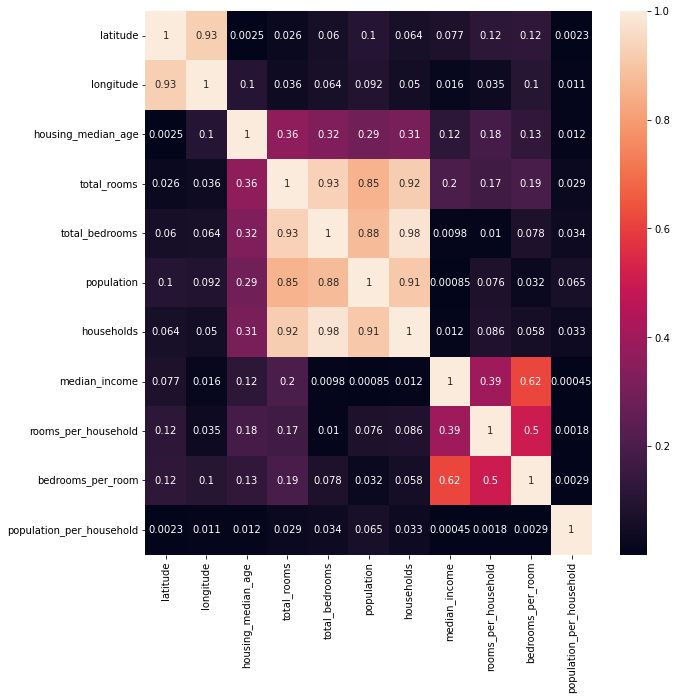

In [198]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Define numerical columns
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

#plot heatmap
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_train[numerical].corr().abs(), annot=True);



The two features with the biggest correlation are total_bedrooms and households (0.98).

## Make median_house_value binary

We need to turn the median_house_value variable from numeric into binary.

Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [199]:
# Calculate mean
mean_target = df['median_house_value'].mean()

display(mean_target)

206855.81690891474

In [200]:
# import numpy 
import numpy as np

y_train_tf = np.where(y_train>mean_target, 1, 0)
y_test_tf = np.where(y_test>mean_target, 1, 0)
y_val_tf = np.where(y_val>mean_target, 1, 0)


## Question 3

Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

What is the value of mutual information?

Round it to 2 decimal digits using round(score, 2)

In [201]:
# Import mutual_info_score
from sklearn.metrics import mutual_info_score

# Calculate mutual information score
mut_info = mutual_info_score(y_train_tf, df_train['ocean_proximity'])

display(mut_info, round(mut_info, 2))


0.10138385763624205

0.1

The rounded value of mutual information is 0.1.

## Question 4

Now let's train a logistic regression

Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [202]:
# Use OneHotCoding on ocean proximity
# import from sklearn
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[numerical+['ocean_proximity']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[numerical+['ocean_proximity']].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [203]:
# import model
from sklearn.linear_model import LogisticRegression

In [204]:
# Fit model on training dataset
lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

lr.fit(X_train, y_train_tf)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [205]:
# Calculate accuracy
y_pred = lr.predict_proba(X_val)[:, 1]

display(y_pred)

array([0.08288731, 0.16716656, 0.95248607, ..., 0.9603688 , 0.85085982,
       0.47081585])

In [206]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred

# Calculate predicted decisions
mean_decision = (y_pred >= 0.5)
df_pred['prediction'] = mean_decision.astype(int)

# Right decisions
df_pred['actual'] = y_val_tf

# Calculate correct decisions
df_pred['correct'] = df_pred.prediction == df_pred.actual
display('Accuracy:', round(df_pred.correct.mean(),2))

'Accuracy:'

0.84

## Question 5

Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
- total_rooms
- total_bedrooms
- population
- households

note: the difference doesn't have to be positive

In [207]:
# Define all features
col_q5 = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Define training and validation set
dv = DictVectorizer(sparse=False)
train_dict = df_train[col_q5].to_dict(orient='records')
X_train_set = dv.fit_transform(train_dict)

val_dict = df_val[col_q5].to_dict(orient='records')
X_val_set = dv.transform(val_dict)

# Fit model on training dataset
lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

lr.fit(X_train_set, y_train_tf)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [208]:
# Define Function for accuracy

def calculate_accuracy(X_val_acc, y_val_acc):
    y_pred_acc = lr.predict_proba(X_val_acc)[:, 1]
    decision_acc = (y_pred_acc >= 0.5).astype(int)
    accuracy = (y_val_acc == decision_acc).mean()
    return accuracy

In [209]:
#Calculate accuracy for all columns

accuracy_all = calculate_accuracy(X_val_set, y_val_tf)
display(accuracy_all)  


0.7095445736434108

In [210]:
# Calculate accurac for every feature
accuracy_diff = {}


for i in range(4):
    cols = col_q5.copy()
    cols.pop(i)

    #Define training and validation set
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[cols].to_dict(orient='records')
    X_train_cols = dv.fit_transform(train_dict)

    val_dict = df_val[cols].to_dict(orient='records')
    X_val_cols = dv.transform(val_dict)

    # Fit model on training dataset
    lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

    lr.fit(X_train_cols, y_train_tf)
    accuracy_cols = calculate_accuracy(X_val_cols, y_val_tf)
    accuracy_diff[col_q5[i]] = accuracy_all - accuracy_cols

In [211]:
display({key: value for key, value in sorted(accuracy_diff.items(), key=lambda item: item[1], reverse=False)})


{'households': 0.03754844961240311,
 'total_bedrooms': 0.04869186046511631,
 'population': 0.05281007751937983,
 'total_rooms': 0.08187984496124034}

'Households' has the smallest difference.

## Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn

We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.

Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.

This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [212]:
# Logarithmic transformation
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [213]:
# Define rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [214]:
# import model
from sklearn.linear_model import Ridge

rmse_res = {}

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)
    y_pred = model.predict(X_val)
    rmse_a = rmse(y_val_log, y_pred)
    rmse_res[a]= round(rmse_a,8)

In [215]:
display({key: value for key, value in sorted(rmse_res.items(), key=lambda item: item[1], reverse=False)})

{0: 0.52406357,
 0.01: 0.52406357,
 0.1: 0.52406357,
 1: 0.52406357,
 10: 0.52406359}

The rmse-values are very simliar. The smallest of the alphas with the same rmse is 0.